In [ ]:
import pandas as pd

In [ ]:
dataFrame=pd.read_excel("bisiklet_fiyatlari.xlsx")

In [ ]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [ ]:
import seaborn as sbn
import matplotlib.pyplot as plt

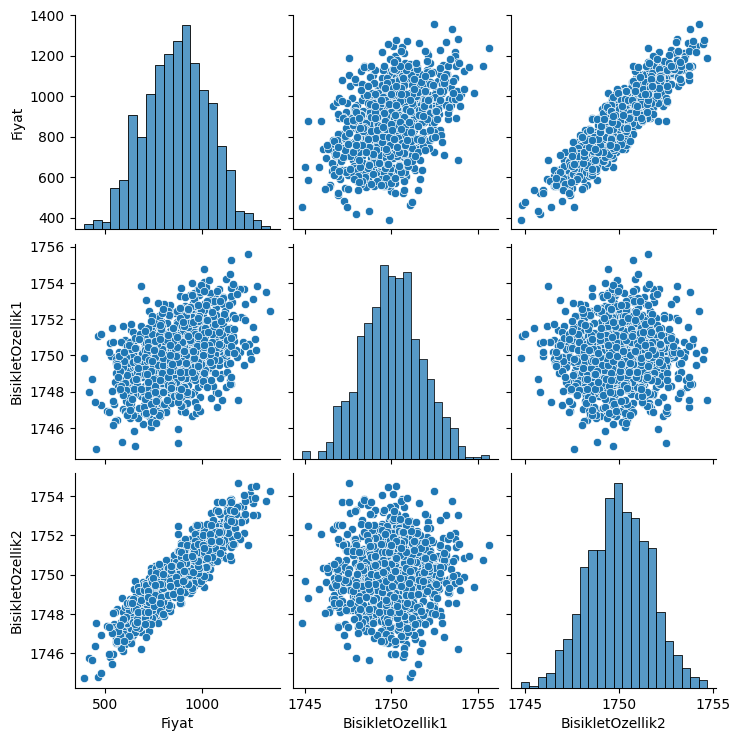

In [ ]:
sbn.pairplot(dataFrame)

## Veriyi Test/Train Setlerine Bölme

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=dataFrame["Fiyat"].values
x=dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [ ]:
x_train.shape

(670, 2)

scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')  #mean squared error

In [ ]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 2ms/step - loss: 795076.7500
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 794530.1250
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 793949.5000
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 793303.6875
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 792581.5625
Epoch 6/250
21/21 [==============================] - 0s 3ms/step - loss: 791766.5625
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 790854.8125
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 789835.4375
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 788704.9375
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 787445.6875
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 786041.6250
Epoch 12/250
21/21 [==============================] - 0s 2ms/st

In [ ]:
loss=model.history.history["loss"]

<Axes: >

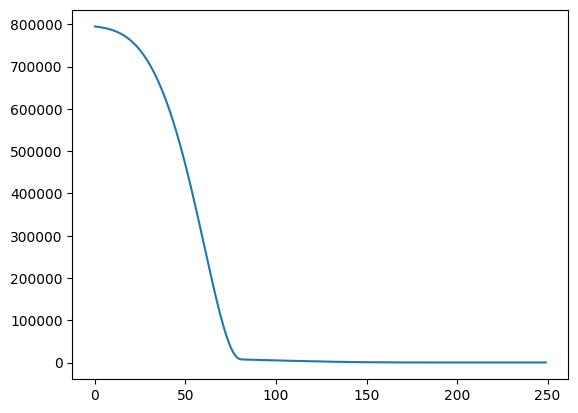

In [ ]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [ ]:
train_loss = model.evaluate(x_train,y_train,verbose=0)
train_loss

79.82025909423828

In [ ]:
test_loss = model.evaluate(x_test,y_test,verbose=0)
test_loss

74.47952270507812

# Model Değerlendirmesi

In [ ]:
testTahminleri=model.predict(x_test)
testTahminleri

11/11 [==============================] - 0s 2ms/step


array([[1080.9556 ],
       [ 625.5145 ],
       [ 878.61975],
       [ 896.74384],
       [ 902.01355],
       [ 452.58414],
       [ 933.8077 ],
       [ 994.28723],
       [ 943.94653],
       [1019.7322 ],
       [ 753.0414 ],
       [ 920.53467],
       [ 950.2012 ],
       [1057.7898 ],
       [1124.7938 ],
       [ 683.42395],
       [1130.2555 ],
       [ 652.6571 ],
       [1157.9646 ],
       [ 889.0813 ],
       [ 895.3672 ],
       [ 718.7958 ],
       [ 458.0449 ],
       [ 613.6241 ],
       [ 837.3889 ],
       [1094.4275 ],
       [ 715.7404 ],
       [ 758.98535],
       [ 875.93933],
       [ 772.7667 ],
       [ 452.37973],
       [ 785.27515],
       [ 730.29816],
       [ 648.5452 ],
       [ 889.2527 ],
       [ 846.18677],
       [1038.7633 ],
       [1025.7548 ],
       [ 847.3381 ],
       [ 864.6593 ],
       [ 759.2617 ],
       [1178.0375 ],
       [1100.8364 ],
       [1091.0183 ],
       [ 875.699  ],
       [ 598.21844],
       [1149.0891 ],
       [ 975.

In [ ]:
tahminDf=pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [ ]:
testTahminleri = pd.Series(testTahminleri)
testTahminleri

0      1080.955566
1       625.514526
2       878.619751
3       896.743835
4       902.013550
          ...     
325    1016.517700
326     793.006775
327     768.121704
328    1171.057861
329     804.968750
Length: 330, dtype: float32

In [ ]:
tahminDf= pd.concat([tahminDf,testTahminleri],axis=1)
tahminDf

,Gerçek Y,0
0,1081.652164,1080.955566
1,622.675990,625.514526
2,889.356810,878.619751
3,902.826733,896.743835
4,897.662404,902.013550
...,...,...
325,1028.438035,1016.517700
326,789.934950,793.006775
327,758.490486,768.121704
328,1172.871659,1171.057861


In [ ]:
tahminDf.columns=["Gerçek Y","Tahmin Y"]
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1080.955566
1,622.675990,625.514526
2,889.356810,878.619751
3,902.826733,896.743835
4,897.662404,902.013550
...,...,...
325,1028.438035,1016.517700
326,789.934950,793.006775
327,758.490486,768.121704
328,1172.871659,1171.057861


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

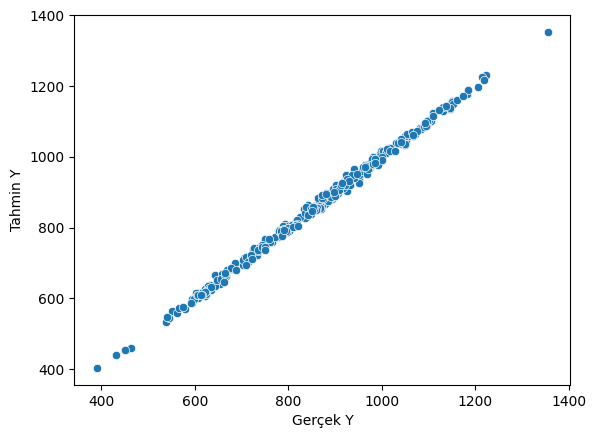

In [ ]:
sbn.scatterplot(x="Gerçek Y",y="Tahmin Y", data=tahminDf)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(tahminDf["Gerçek Y"], tahminDf['Tahmin Y'])

6.915668410549237

In [ ]:
mean_squared_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

74.47951804877603

In [ ]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [ ]:
yeniBisikletOzellikleri = [[1760,1758]]

In [ ]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [ ]:
model.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 49ms/step


array([[1989.9928]], dtype=float32)

In [ ]:
from keras.models import load_model

In [ ]:
model.save("bisiklet_modeli.h5") #olmadı pickle ile falan dene 

In [ ]:
sonradanCagirilanModel = load_model("bisiklet_model.h5")

In [ ]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)